# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")
sns.set_style("white")


<IPython.core.display.Javascript object>

## Loading Data

In [2]:
df = pd.read_csv('Train.csv.csv') ##  Complete the code to read the data
df_test = pd.read_csv('Test.csv.csv') ##  Complete the code to read the data


<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the training data
df.shape ##  Complete the code to view dimensions of the train data

(20000, 41)

<IPython.core.display.Javascript object>

In [4]:
# Checking the number of rows and columns in the test data
df_test.shape ##  Complete the code to view dimensions of the test data

(5000, 41)

<IPython.core.display.Javascript object>

## Data Overview

In [5]:
# let's create a copy of the training data
data = df.copy()

<IPython.core.display.Javascript object>

In [6]:
# let's create a copy of the training data
data_test = df_test.copy()

<IPython.core.display.Javascript object>

In [7]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

In [8]:
# let's view the last 5 rows of the data
data.tail()##  Complete the code to view last 5 rows of the data  

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


<IPython.core.display.Javascript object>

In [9]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [10]:
# let's check for duplicate values in the data
data.duplicated().any() ##  Complete the code to check duplicate entries in the data

False

<IPython.core.display.Javascript object>

In [11]:
# let's check for missing values in the data
data.isna().sum() ##  Complete the code to check missing entries in the train data

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# let's check for missing values in the data
data_test.isna().sum() ##  Complete the code to check missing entries in the test data

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

## EDA

### Univariate analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    f2.savefig(f'{feature}.png',dpi=200)

<IPython.core.display.Javascript object>

### Plotting histograms and boxplots for all the variables

In [ ]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

In [15]:
data.Target.value_counts(normalize=True)

0   0.945
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

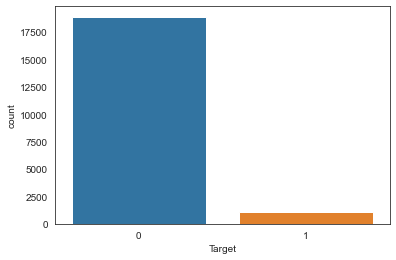

<IPython.core.display.Javascript object>

In [16]:
sns.countplot(data=data,x="Target")
plt.savefig('targetcounts.png')

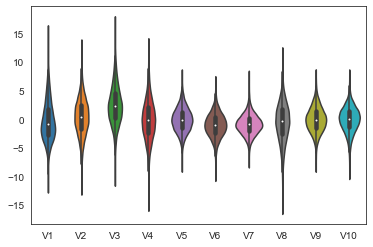

<IPython.core.display.Javascript object>

In [22]:
f1=sns.violinplot(data=data.iloc[:,:10])
plt.savefig('violin1.png')

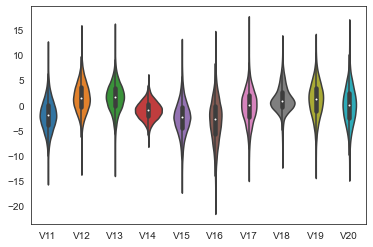

<IPython.core.display.Javascript object>

In [270]:
f2=sns.violinplot(data=data.iloc[:,10:20])
plt.savefig('violin2.png')


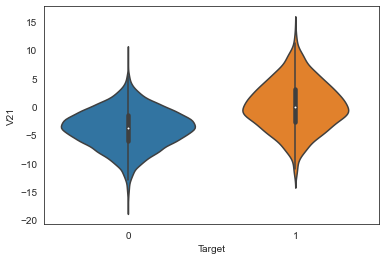

<IPython.core.display.Javascript object>

In [51]:
sns.violinplot(data=data,y=data.columns.tolist()[20],x="Target")
plt.savefig('violin3.png')

In [ ]:
sns.violinplot(data=data.iloc[:,30:40])
plt.savefig('violin4.png')

In [ ]:
for col in df.columns:
    sns.displot(data=data,x=col,hue='Target',kind='ecdf')
    plt.title('Empirical cumulative distribution')
    plt.savefig(f'ecdf_{col}.png')

In [80]:
data[['V18','Target']].rolling(min_periods = 1, window = 3).corr().iloc[0::2,-1].reset_index()[:10]

,level_0,level_1,Target
0,0,V18,NaN
1,1,V18,NaN
2,2,V18,NaN
3,3,V18,NaN
4,4,V18,NaN
5,5,V18,NaN
6,6,V18,NaN
7,7,V18,-0.921
8,8,V18,-0.978
9,9,V18,-0.343


<IPython.core.display.Javascript object>

In [74]:
data[['V22','Target']].rolling(min_periods = 1, window = 3).corr().iloc[0::2,-1].reset_index()[:100]

,level_0,level_1,Target
0,0,V22,NaN
1,1,V22,NaN
2,2,V22,NaN
3,3,V22,NaN
4,4,V22,NaN
5,5,V22,NaN
6,6,V22,NaN
7,7,V22,0.965
8,8,V22,0.992
9,9,V22,0.920


<IPython.core.display.Javascript object>

### Let's look at the values in target variable

In [27]:
data["Target"].value_counts(normalize=True)##  Complete the code to check the class distribution in target variable for train data

0   0.945
1   0.056
Name: Target, dtype: float64

<IPython.core.display.Javascript object>

## Data Pre-Processing

In [28]:
# Dividing data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

X_test = data_test.drop(['Target'],axis=1) ##  Complete the code to drop target variable from test data
y_test = data_test['Target'] ##  Complete the code to store target variable in y_test

<IPython.core.display.Javascript object>

In [29]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


<IPython.core.display.Javascript object>

In [30]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="median")

<IPython.core.display.Javascript object>

In [31]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val =  pd.DataFrame(imputer.fit_transform(X_val),columns=X_val.columns) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test =  pd.DataFrame(imputer.fit_transform(X_test),columns=X_test.columns)  ## Complete the code to impute missing values in X_test

<IPython.core.display.Javascript object>

In [32]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

X_val.isna().sum() ## Complete the code to check the count of missing values in validation set
X_test.isna().sum() ## Complete the code to check the count of missing values in test set

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [35]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model Building on original data

In [66]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1))) 
models.append(("XGB", XGBClassifier(random_state=1))) 

## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean())) 

print("\n" "Validation Performance:" "\n")
scores=[]
for name, model in models:
    model.fit(X_train, y_train)
    recall_scores = recall_score(y_val, model.predict(X_val))
    scores.append(recall_scores)
    print("{}: {}".format(name, recall_scores))


Cross-Validation Cost:

Logistic regression: 0.4916666666666667
Bagging: 0.7071428571428571
RandomForest: 0.7285714285714286
AdaBoost: 0.6142857142857143
GradientBoost: 0.7178571428571427
XGB: 0.8047619047619048

Validation Performance:

Logistic regression: 0.4888888888888889
Bagging: 0.662962962962963
RandomForest: 0.7222222222222222
AdaBoost: 0.6037037037037037
GradientBoost: 0.7222222222222222
XGB: 0.7925925925925926


<IPython.core.display.Javascript object>

In [31]:
ff=pd.DataFrame([dict(zip(names,[results1[i].mean() for i in range(6)]))],index=['training'])
ff2=pd.DataFrame([dict(zip(names,scores))],index=['validation'])
pd.concat([ff,ff2])

,Logistic regression,Bagging,randomforest,adaboost,gradientboost,XGB
training,0.490,0.698,0.728,0.631,0.720,0.795
validation,0.491,0.680,0.726,0.577,0.712,0.772


<IPython.core.display.Javascript object>

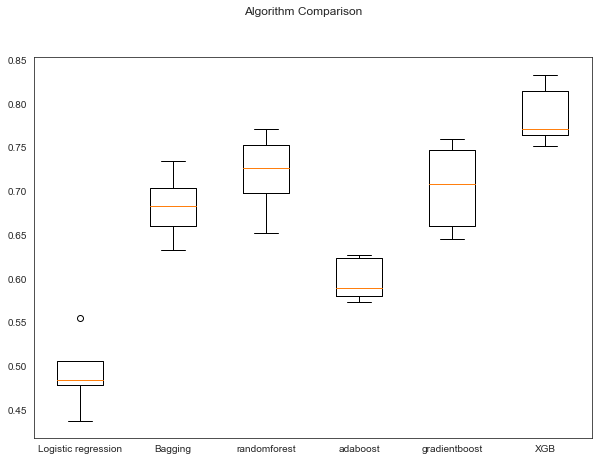

<IPython.core.display.Javascript object>

In [34]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [36]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 833
Before OverSampling, counts of label '0': 14167 

After OverSampling, counts of label '1': 14167
After OverSampling, counts of label '0': 14167 

After OverSampling, the shape of train_X: (28334, 40)
After OverSampling, the shape of train_y: (28334,) 



<IPython.core.display.Javascript object>

In [37]:
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")
for name,model in models:## Complete the code to build models on oversampled data 
    k_folds=StratifiedKFold(random_state=1,shuffle=True,n_splits=5)
    results=cross_val_score(model,X_train_over,y_train_over,cv=k_folds,scoring=scorer)    
## Note - Take reference from the original models built above
    results1.append(results)
    names.append(name)
    print('{} results is {}'.format(name,results.mean()))
print("\n" "Validation Performance:" "\n")
all_scores=[]
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    all_scores.append(scores)
    print("{}: {}".format(name, scores))



Cross-Validation Cost:

Logistic regression results is 0.8864848837333417
Bagging results is 0.9745629248901775
randomforest results is 0.9813975828966368
adaboost results is 0.8947288857181794
gradientboost results is 0.924675707656941
XGB results is 0.9886555206959542

Validation Performance:

Logistic regression: 0.8245033112582781
Bagging: 0.8443708609271523
randomforest: 0.8509933774834437
adaboost: 0.8278145695364238
gradientboost: 0.8708609271523179
XGB: 0.8609271523178808


<IPython.core.display.Javascript object>

In [38]:
ff=pd.DataFrame([dict(zip(names,[results1[i].mean() for i in range(6)]))],index=['training'])
ff2=pd.DataFrame([dict(zip(names,all_scores))],index=['validation'])
pd.concat([ff,ff2])

,Logistic regression,Bagging,randomforest,adaboost,gradientboost,XGB
training,0.886,0.975,0.981,0.895,0.925,0.989
validation,0.825,0.844,0.851,0.828,0.871,0.861


<IPython.core.display.Javascript object>

[Text(1, 0, 'Logistic regression'),
 Text(2, 0, 'Bagging'),
 Text(3, 0, 'randomforest'),
 Text(4, 0, 'adaboost'),
 Text(5, 0, 'gradientboost'),
 Text(6, 0, 'XGB')]

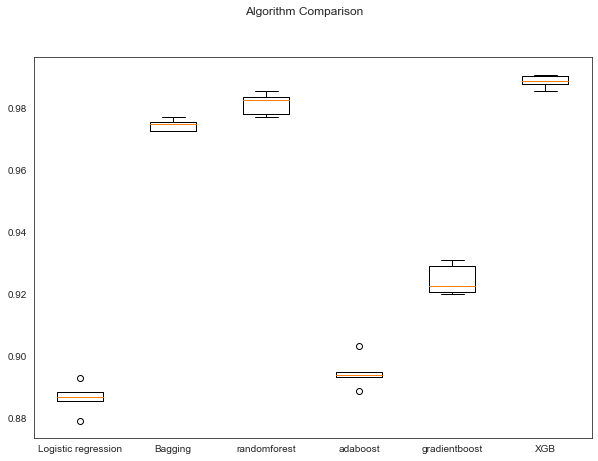

<IPython.core.display.Javascript object>

In [39]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names) ## Write the code to create boxplot to check model performance on oversampled data

### Model Building with undersampled data

In [37]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 833
Before UnderSampling, counts of label '0': 14167 

After UnderSampling, counts of label '1': 833
After UnderSampling, counts of label '0': 833 

After UnderSampling, the shape of train_X: (1666, 40)
After UnderSampling, the shape of train_y: (1666,) 



<IPython.core.display.Javascript object>

In [41]:
results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")
all_scores=[]
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    all_scores.append(scores)
    print("{}: {}".format(name, scores)) ## Complete the code to build models on undersampled data 
## Note - Take reference from the original models built above


Cross-Validation Cost:

Logistic regression: 0.8576719576719578
Bagging: 0.841515221225366
randomforest: 0.8786826163637759
adaboost: 0.8601564297216472
gradientboost: 0.8712752089563682
XGB: 0.8886128364389234

Validation Performance:

Logistic regression: 0.8443708609271523
Bagging: 0.8774834437086093
randomforest: 0.9006622516556292
adaboost: 0.8708609271523179
gradientboost: 0.890728476821192
XGB: 0.9072847682119205


<IPython.core.display.Javascript object>

In [42]:
ff=pd.DataFrame([dict(zip(names,[results1[i].mean() for i in range(6)]))],index=['training'])
ff2=pd.DataFrame([dict(zip(names,all_scores))],index=['validation'])
pd.concat([ff,ff2])

,Logistic regression,Bagging,randomforest,adaboost,gradientboost,XGB
training,0.858,0.842,0.879,0.860,0.871,0.889
validation,0.844,0.877,0.901,0.871,0.891,0.907


<IPython.core.display.Javascript object>

[Text(1, 0, 'Logistic regression'),
 Text(2, 0, 'Bagging'),
 Text(3, 0, 'randomforest'),
 Text(4, 0, 'adaboost'),
 Text(5, 0, 'gradientboost'),
 Text(6, 0, 'XGB')]

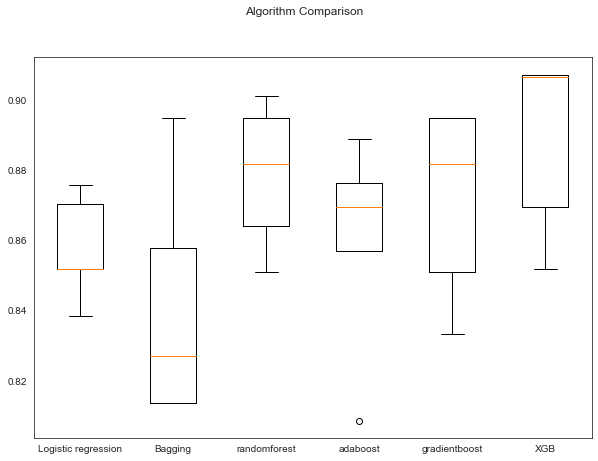

<IPython.core.display.Javascript object>

In [43]:
# Plotting boxplots for CV scores of all models defined above
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names) ## Write the code to create boxplot to check model performance on undersampled data

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [124]:
%%time 

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9631071424556618:
CPU times: total: 1min 29s
Wall time: 26min 12s


<IPython.core.display.Javascript object>

In [92]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier(
    n_estimators= 200, learning_rate= 0.2, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

<IPython.core.display.Javascript object>

In [93]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.992,0.989,0.996,0.992


<IPython.core.display.Javascript object>

In [94]:
ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val) ## Complete the code to check the performance on validation set
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.979,0.866,0.777,0.819


<IPython.core.display.Javascript object>

### Tuning Random forest using undersampled data

In [71]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8942134363402257:
CPU times: total: 1.59 s
Wall time: 1min 7s


<IPython.core.display.Javascript object>

In [39]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=200,
    min_samples_leaf=2,
)## Complete the code with the best parameters obtained from tuning

tuned_rf2.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_samples=0.6, min_samples_leaf=2, n_estimators=200,
                       random_state=1)

<IPython.core.display.Javascript object>

In [40]:
rf2_train_perf =  model_performance_classification_sklearn(tuned_rf2, X_train_un,y_train_un) ## Complete the code to check the performance on undersampled train set
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.967,0.935,0.999,0.966


<IPython.core.display.Javascript object>

In [41]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val,y_val) ## Complete the code to check the performance on validation set
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.942,0.899,0.488,0.633


<IPython.core.display.Javascript object>

### Tuning Random forest using oversampled data

In [298]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9809416741543673:
CPU times: total: 25.7 s
Wall time: 16min 57s


<IPython.core.display.Javascript object>

In [300]:
# Creating new pipeline with best parameters
tuned_rf3 = RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=250,
    min_samples_leaf=1,
)## Complete the code with the best parameters obtained from tuning

tuned_rf3.fit(X_train_over,y_train_over) ## Complete the code to fit the model on under sampled data

RandomForestClassifier(max_samples=0.6, n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [301]:
rf3_train_perf =  model_performance_classification_sklearn(tuned_rf3, X_train_over,y_train_over) ## Complete the code to check the performance on undersampled train set
rf3_train_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [302]:
rf3_val_perf = model_performance_classification_sklearn(tuned_rf3, X_val,y_val) ## Complete the code to check the performance on validation set
rf3_val_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.852,0.887,0.869


<IPython.core.display.Javascript object>

### Tuning Gradient Boosting using oversampled data

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1,v)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [87]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.5,
    random_state=1,
    learning_rate=1,
    n_estimators=125,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [88]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.981,0.978,0.983,0.981


<IPython.core.display.Javascript object>

In [89]:
gbm_val_perf = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.957,0.856,0.578,0.690


<IPython.core.display.Javascript object>

### Tuning XGBoost using oversampled data

**Note**: You can choose to skip this section if XGBoost gives error.

In [96]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV#'scale_pos_weight':[5,10]
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,verbose=2, n_iter=50, n_jobs = -1, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9963999352046328:
CPU times: total: 2min 9s
Wall time: 57min 13s


<IPython.core.display.Javascript object>

In [105]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
)## Complete the code with the best parameters obtained from tuning

xgb2.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

In [107]:
xgb2_train_perf =  model_performance_classification_sklearn(
    xgb2,X_train_over, y_train_over) ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.998,1.000,0.996,0.998


<IPython.core.display.Javascript object>

In [110]:
xgb2_val_perf = model_performance_classification_sklearn(
    xgb2,X_val, y_val)  ## Complete the code to check the performance on validation set
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.974,0.899,0.709,0.793


<IPython.core.display.Javascript object>

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance comparison

In [102]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
       xgb2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Gradient Boosting tuned with oversampled data,0.981,0.978,0.983,0.981
AdaBoost classifier tuned with oversampled data,0.992,0.989,0.996,0.992
Random forest tuned with undersampled data,0.967,0.935,0.999,0.966
XGBoost tuned with oversampled data,0.998,1.000,0.996,0.998


<IPython.core.display.Javascript object>

In [103]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
       xgb2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "AdaBoost classifier tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "XGBoost tuned with oversampled data",
]
print("Training performance comparison:")
models_val_comp_df.T

## Write the code to compare the performance on validation set

Training performance comparison:


,Accuracy,Recall,Precision,F1
Gradient Boosting tuned with oversampled data,0.957,0.856,0.578,0.690
AdaBoost classifier tuned with oversampled data,0.979,0.866,0.777,0.819
Random forest tuned with undersampled data,0.942,0.899,0.488,0.633
XGBoost tuned with oversampled data,0.974,0.899,0.709,0.793


<IPython.core.display.Javascript object>

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [116]:
# Let's check the performance on test set
best_model = model_performance_classification_sklearn(
    tuned_rf2,X_test, y_test) 
best_model
## Write the code to check the performance of best model on test data

,Accuracy,Recall,Precision,F1
0,0.943,0.869,0.498,0.633


<IPython.core.display.Javascript object>

### Feature Importances

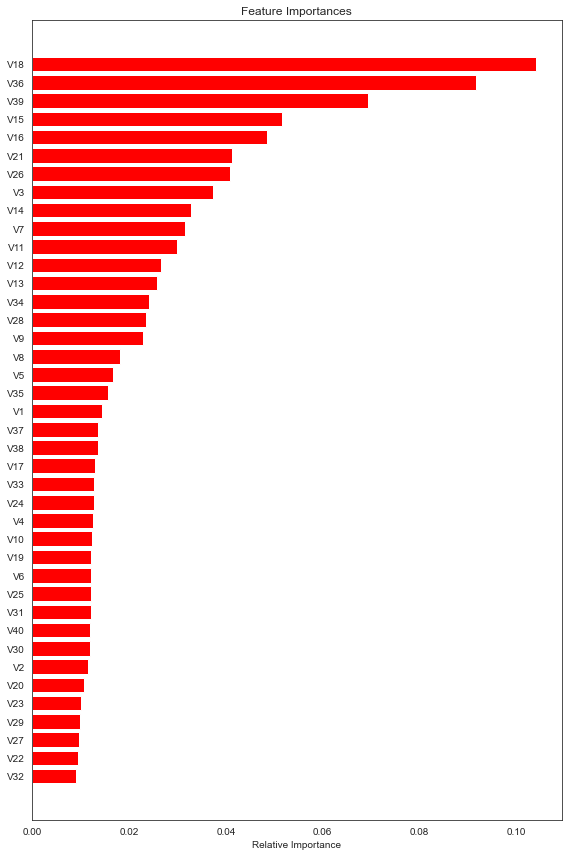

<IPython.core.display.Javascript object>

In [187]:
feature_names = X_train.columns
importances =  tuned_rf2.feature_importances_## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(8, 12))
plt.title("Feature Importances")


plt.barh(range(len(indices)), importances[indices], color='red', align="center")

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig('features.png',ppi=200)


In [313]:
blue=data[data['Target']==0].mean()#.plot.line(color='blue')
red=data[data['Target']==1].mean()#.plot.line(color='red')
#pd.DataFrame([blue,red],index=['blue','red'])

<IPython.core.display.Javascript object>

In [ ]:
data[data['Target']==0].mean().plot.line(color='blue',figsize=(12,8))
data[data['Target']==1].mean().plot.line(color='red',figsize=(12,8))

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [165]:
Model = Pipeline([('imputer',SimpleImputer(strategy="median")),
                  ('RadomForest',RandomForestClassifier(
    max_features='sqrt',
    random_state=1,
    max_samples=0.6,
    n_estimators=200,
    min_samples_leaf=2,
))
                  
                  ] ) ## Complete the code to create pipeline for the best model

<IPython.core.display.Javascript object>

In [166]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.drop(columns="Target")##  Complete the code to drop target variable from test data
y_test1 = df_test["Target"] ##  Complete the code to store target variable in y_test1


<IPython.core.display.Javascript object>

In [167]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)


# We don't need to impute missing values in test set as it will be done inside pipeline

<IPython.core.display.Javascript object>

In [168]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [171]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_un1, y_un1 = rus.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [177]:
Model.fit(X_over1, y_over1) ##  Complete the code to fit the Model obtained from above step

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('RadomForest',
                 RandomForestClassifier(max_samples=0.6, min_samples_leaf=2,
                                        n_estimators=200, random_state=1))])

<IPython.core.display.Javascript object>

In [179]:
Model_train = model_performance_classification_sklearn(Model,X_over1, y_over1)  
Model_train

,Accuracy,Recall,Precision,F1
0,0.998,0.997,0.999,0.998


<IPython.core.display.Javascript object>

In [180]:
Model_test = model_performance_classification_sklearn(Model, X_test1, y_test1)  ## Complete the code to check the performance on test set
Model_test

,Accuracy,Recall,Precision,F1
0,0.988,0.858,0.931,0.893


<IPython.core.display.Javascript object>